In [27]:
# !pip install matplotlib
# !pip install pandas
# !pip install numpy

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Generate time/#threads plots

In [29]:
data = pd.read_csv("./outputs/timings/time-th-731729.csv")
data.head()

,nthreads,time
0,1,11.311642
1,2,21.546202
2,3,18.778645
3,4,19.114670
4,5,18.694123


In [ ]:
df100 = data[data["dim"] = 100]
df500 = data[data["dim"] = 500]
df1000 = data[data["dim"] = 1000]
df1500 = data[data["dim"] = 1500]
df2000 = data[data["dim"] = 2000]

In [30]:
#Add speedup column
def add_speedup_and_normalized_t_columns(data: pd.DataFrame):
    data["speedup"] = data["time"].iloc[0] / (data["time"])
    max_time = data["time"].max()
    data["max_normalized"] = data["time"].div(max_time)

add_speedup_and_normalized_t_columns(df100)
add_speedup_and_normalized_t_columns(df500)
add_speedup_and_normalized_t_columns(df1000)
add_speedup_and_normalized_t_columns(df1500)
add_speedup_and_normalized_t_columns(df2000)

In [ ]:
df100.head()

Text(0, 0.5, 'Normalized\ntime')

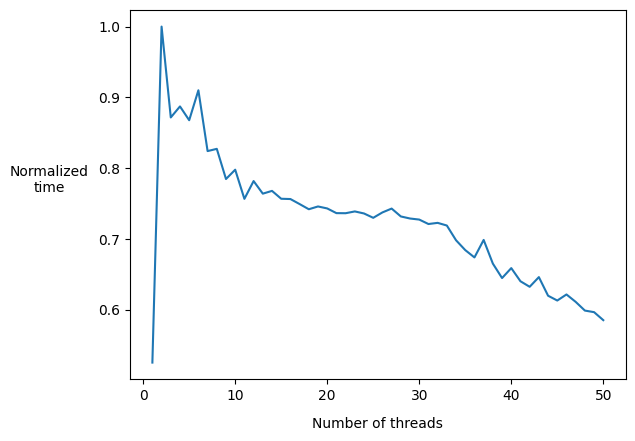

In [37]:
dataframes = [
    (df100, "Dimension 100", "green"),
    (df500, "Dimension 500", "blue"),
    (df1000, "Dimension 1000", "red"),
    (df1500, "Dimension 1500", "purple"),
    (df2000, "Dimension 2000", "yellow")
]

plt.figure(figsize=(10, 6))

for df, label, color in dataframes:
    plt.plot(df["nthreads"], df["max_normalized"], label=label, color=color)

plt.xlabel("Number of threads", labelpad=10, fontsize=10)
plt.ylabel("Normalized\ntime", labelpad=35, rotation=0, fontsize=10)
plt.legend()
plt.show()

Text(0, 0.5, 'Speedup')

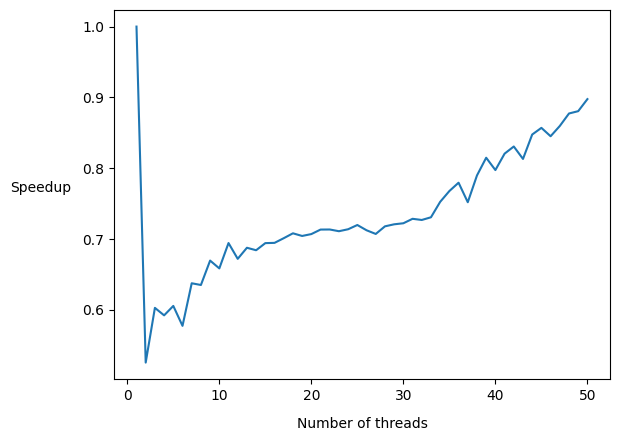

In [38]:
plt.figure(figsize=(10, 6))

for df, label, color in dataframes:
    plt.plot(df["nthreads"], df["speedup"], label=label, color=color)

plt.xlabel("Number of threads", labelpad=10, fontsize=10)
plt.ylabel("Speedup", labelpad=30, rotation=0, fontsize=10)
plt.legend()
plt.show()